## ANÁLISIS EXPLORATORIO DEL CINE Y SU RELACIÓN CON DIFERENTES VARIBLES

Este análisis exploratorio de datos (EDA) se adentra en el mundo del cine con una mirada estadística. A partir de datos de IMDb y los premios Oscar, se estudian distintas variables que podrían influir en el éxito de una película, como el presupuesto, la duración, los géneros o los premios recibidos. Se formulan y comprueban varias hipótesis para buscar patrones que expliquen las valoraciones del público. 

El objetivo es descubrir tendencias que, aunque no siempre se ven en pantalla, están presentes en los números. El cine se observa aquí no solo como arte, sino como fenómeno medible.

### HIPÓTESIS:

1. ¿Cuanto mayor el presupuesto de una película, mayor su recaudación?

    Analiza correlación entre presupuesto y recaudación.

2. ¿Las películas ganadoras de premios importantes (Oscar, etc.) reciben más valoración del público en IMDb?


3. ¿La duración ideal para obtener una alta valoración está entre 90 y 120 minutos?


4. ¿Las películas más valoradas tienden a pertenecer a géneros más serios (drama, thriller, documental) que a informales como comedia o romance?

5. ¿Las películas con más actores principales son mejor valoradas que las que tienen menos?


### HIPÓTESIS 1 "Cuanto mayor el presupuesto de una película, mayor su recaudación"

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Leemos el archivo CSV y lo guardamos en una variable llamada "df"
movies_5000_df = pd.read_csv("dataF/tmdb_5000_movies.csv")

# Mostramos las primeras 5 filas para ver cómo es el contenido
movies_5000_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [27]:
movies_5000_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

PASO 2: Filtrar los valores donde budget (presupuesto) o revenue (recaudación) sean 0
Vamos a eliminar todas las filas donde:

El presupuesto sea 0.

O la recaudación sea 0.

Esto se hace porque un presupuesto o una recaudación de 0 significa que no hay dato real o no se conoce, y eso afectaría al análisis.



In [28]:
# Filtramos las filas donde el presupuesto (budget) y la recaudación (revenue) sean mayores que 0
dataframe_sin_ceros = movies_5000_df[(movies_5000_df['budget'] > 0) & (movies_5000_df['revenue'] > 0)]

# Mostramos cuántas películas quedan después del filtrado
print("Número de películas después de filtrar:", len(dataframe_sin_ceros))


Número de películas después de filtrar: 3229


In [43]:
# Creamos el nuevo DataFrame solo con las columnas que nos interesan
presupuesto_recaudacion_df = dataframe_sin_ceros[['budget', 'revenue']]

# Renombramos las columnas al español
presupuesto_recaudacion_df = presupuesto_recaudacion_df.rename(columns={
    'budget': 'presupuesto',
    'revenue': 'recaudacion'
})

# Mostramos el número de registros en el nuevo DataFrame
print("Número de películas con presupuesto y recaudación válidos:", len(presupuesto_recaudacion_df))

# Mostramos las primeras filas para comprobar los cambios
presupuesto_recaudacion_df.head()

Número de películas con presupuesto y recaudación válidos: 3229


,presupuesto,recaudacion
0,237000000,2787965087
1,300000000,961000000
2,245000000,880674609
3,250000000,1084939099
4,260000000,284139100


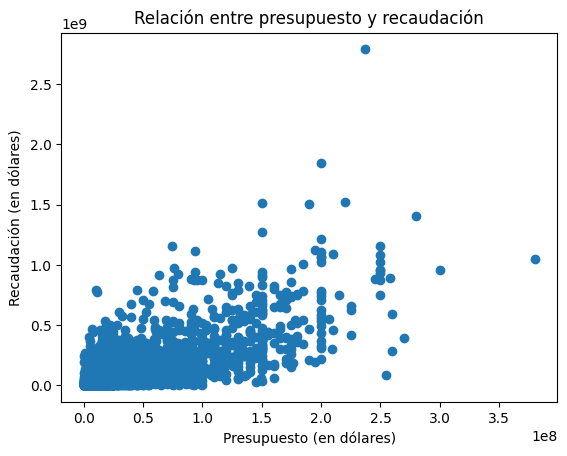

In [30]:
# Creamos el gráfico de dispersión
plt.scatter(presupuesto_recaudacion_df['presupuesto'], presupuesto_recaudacion_df['recaudacion'])

# Añadimos título y etiquetas a los ejes
plt.title("Relación entre presupuesto y recaudación")
plt.xlabel("Presupuesto (en dólares)")
plt.ylabel("Recaudación (en dólares)")

# Mostramos el gráfico
plt.show()

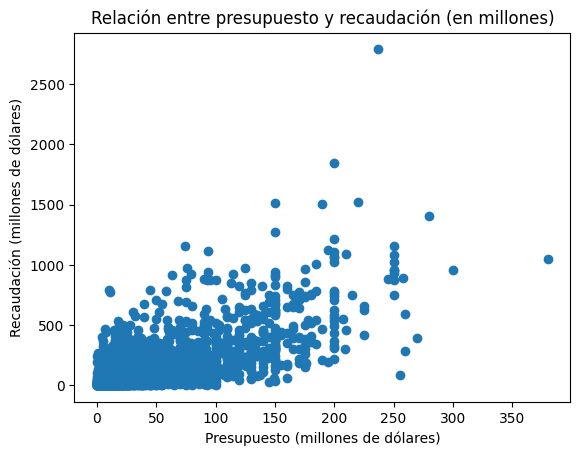

In [31]:

# Creamos el gráfico de dispersión sin modificar el DataFrame original
plt.scatter(
    presupuesto_recaudacion_df['presupuesto'] / 1_000_000,  # Convertimos a millones solo para el gráfico
    presupuesto_recaudacion_df['recaudacion'] / 1_000_000   # Convertimos a millones solo para el gráfico
)

# Añadimos título y etiquetas con unidades claras
plt.title("Relación entre presupuesto y recaudación (en millones)")
plt.xlabel("Presupuesto (millones de dólares)")
plt.ylabel("Recaudación (millones de dólares)")

# Mostramos el gráfico
plt.show()


In [32]:
# Mostramos los valores mínimo y máximo del presupuesto y la recaudación
presupuesto_min = presupuesto_recaudacion_df['presupuesto'].min()
presupuesto_max = presupuesto_recaudacion_df['presupuesto'].max()
recaudacion_min = presupuesto_recaudacion_df['recaudacion'].min()
recaudacion_max = presupuesto_recaudacion_df['recaudacion'].max()

print(f"Presupuesto mínimo: {presupuesto_min:,} $")
print(f"Presupuesto máximo: {presupuesto_max:,} $")
print(f"Recaudación mínima: {recaudacion_min:,} $")
print(f"Recaudación máxima: {recaudacion_max:,} $")


Presupuesto mínimo: 1 $
Presupuesto máximo: 380,000,000 $
Recaudación mínima: 5 $
Recaudación máxima: 2,787,965,087 $


In [33]:
# Película con el presupuesto mínimo
pelicula_presupuesto_min = dataframe_sin_ceros[dataframe_sin_ceros['budget'] == dataframe_sin_ceros['budget'].min()]
print("🎬 Película con el presupuesto mínimo:")
print(pelicula_presupuesto_min[['title', 'budget', 'revenue']])

# Película con el presupuesto máximo
pelicula_presupuesto_max = dataframe_sin_ceros[dataframe_sin_ceros['budget'] == dataframe_sin_ceros['budget'].max()]
print("\n🎬 Película con el presupuesto máximo:")
print(pelicula_presupuesto_max[['title', 'budget', 'revenue']])

# Película con la recaudación mínima
pelicula_recaudacion_min = dataframe_sin_ceros[dataframe_sin_ceros['revenue'] == dataframe_sin_ceros['revenue'].min()]
print("\n💸 Película con la recaudación mínima:")
print(pelicula_recaudacion_min[['title', 'budget', 'revenue']])

# Película con la recaudación máxima
pelicula_recaudacion_max = dataframe_sin_ceros[dataframe_sin_ceros['revenue'] == dataframe_sin_ceros['revenue'].max()]
print("\n💸 Película con la recaudación máxima:")
print(pelicula_recaudacion_max[['title', 'budget', 'revenue']])


🎬 Película con el presupuesto mínimo:
             title  budget  revenue
4238  Modern Times       1  8500000

🎬 Película con el presupuesto máximo:
                                          title     budget     revenue
17  Pirates of the Caribbean: On Stranger Tides  380000000  1045713802

💸 Película con la recaudación mínima:
             title  budget  revenue
3372  Split Second       7        5

💸 Película con la recaudación máxima:
    title     budget     revenue
0  Avatar  237000000  2787965087


In [34]:
# Películas con presupuesto menor de 1.000
presupuestos_bajos = dataframe_sin_ceros[dataframe_sin_ceros['budget'] < 1_000]
print("Películas con presupuesto < 1.000:", len(presupuestos_bajos))

# Películas con recaudación menor de 1.000
recaudaciones_bajas = dataframe_sin_ceros[dataframe_sin_ceros['revenue'] < 1_000]
print("Películas con recaudación < 1.000:", len(recaudaciones_bajas))

# Películas que cumplen cualquiera de las dos condiciones
total_sospechosas = dataframe_sin_ceros[
    (dataframe_sin_ceros['budget'] < 1_000) | (dataframe_sin_ceros['revenue'] < 1_000)
]
print("Total películas con valores sospechosos:", len(total_sospechosas))


Películas con presupuesto < 1.000: 13
Películas con recaudación < 1.000: 15
Total películas con valores sospechosos: 18


📊 Resultados obtenidos:
Películas con presupuesto < 1.000 → 13

Películas con recaudación < 1.000 → 15

Películas con presupuesto o recaudación sospechosa (sin contar duplicados) → 18

📦 Tamaño del conjunto actual
Recordemos que el DataFrame dataframe_sin_ceros tiene:

📌 3229 películas

📐 Cálculo del impacto
Vamos a ver qué porcentaje representan esas películas:

Impacto
=
18
3229
×
100
≈
0.56
%
Impacto= 
3229
18
​
 ×100≈0.56%
🔍 Menos del 0.6% del total.

✅ Conclusión
El número de películas con valores sospechosos es muy pequeño.

No eliminarlas apenas cambiaría los resultados generales.

Sí eliminarlas mejora la claridad visual (gráficos) y evita distorsiones estadísticas.

📌 Por tanto, sí es razonable eliminarlas, porque:

Son claramente datos erróneos (1 $ ó 5 $ no es real).

Representan menos del 1% del total.

Su exclusión no altera la muestra significativamente, pero mejora el análisis.



In [35]:
# Eliminamos las películas con presupuesto o recaudación sospechosamente bajos
dataframe_limpio = dataframe_sin_ceros[
    (dataframe_sin_ceros['budget'] >= 1_000) &
    (dataframe_sin_ceros['revenue'] >= 1_000)
]

# Mostramos cuántas películas quedan tras la limpieza
print("Número de películas tras eliminar valores irreales:", len(dataframe_limpio))


Número de películas tras eliminar valores irreales: 3211


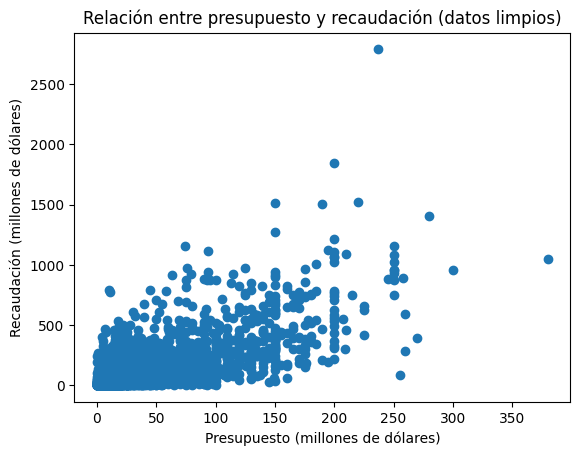

In [36]:
import matplotlib.pyplot as plt

# Dibujamos el gráfico usando los datos ya limpios y en millones de dólares
plt.scatter(
    dataframe_limpio['budget'] / 1_000_000,
    dataframe_limpio['revenue'] / 1_000_000
)

# Añadimos título y etiquetas con unidades
plt.title("Relación entre presupuesto y recaudación (datos limpios)")
plt.xlabel("Presupuesto (millones de dólares)")
plt.ylabel("Recaudación (millones de dólares)")

# Mostramos el gráfico
plt.show()


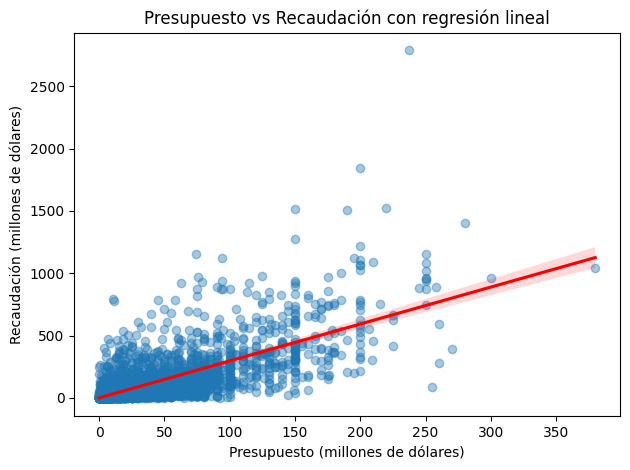

In [ ]:

# Creamos un nuevo DataFrame temporal con valores en millones (sin modificar el original)
df_millones = dataframe_limpio.copy()
df_millones['presupuesto_millones'] = df_millones['budget'] / 1_000_000
df_millones['recaudacion_millones'] = df_millones['revenue'] / 1_000_000

# Creamos el gráfico con línea de regresión
plt.figure()
sns.regplot(
    x='presupuesto_millones',
    y='recaudacion_millones',
    data=df_millones,
    scatter_kws={'alpha': 0.4},  # puntos semitransparentes
    line_kws={'color': 'red'}    # línea roja
)

# Etiquetas y título
plt.title("Presupuesto vs Recaudación")
plt.xlabel("Presupuesto (millones de dólares)")
plt.ylabel("Recaudación (millones de dólares)")
plt.tight_layout()
plt.show()


#### ❓ ¿Por qué se llama “regresión” lineal?
Aunque la palabra suena rara, no tiene nada que ver con retroceder ni con cosas negativas. Viene de un término estadístico histórico, y su significado actual es muy claro:

Regresión = encontrar una línea recta (o una curva) que resume la relación entre dos variables.

#### 🧠 En este caso:
Queremos saber:

“¿Cómo cambia la recaudación cuando cambia el presupuesto?”

La regresión lineal traza una línea recta que pasa más o menos por el centro de todos los puntos del gráfico de dispersión.
Esa línea intenta resumir la relación general entre presupuesto y recaudación.

#### 🎯 ¿Qué hace esa línea?
Si la línea sube hacia la derecha, significa que cuanto más presupuesto, más recaudación → relación positiva.

Si la línea bajara, indicaría una relación negativa (no es el caso).

Si fuera horizontal, significaría que el presupuesto no influye en la recaudación.

🔍 El nombre completo sería “regresión lineal simple” porque es una recta, y solo relaciona dos variables.

#### 🧾 ¿Por qué se usa la palabra “regresión”?
Históricamente, el término viene del siglo XIX, cuando el científico Francis Galton estudiaba cómo los hijos “regresaban” hacia la estatura media de sus padres.
De ahí el nombre "regresión hacia la media". Pero hoy ya no tiene ese sentido literal.






#### ✅ Interpretación del gráfico con regresión lineal
1. Nube de puntos azules:
Cada punto representa una película.

Como antes, el eje X es el presupuesto, y el eje Y es la recaudación (ambos en millones).

2. Línea roja (regresión lineal):
Es una línea que resume la tendencia general de los datos.

En este caso, sube hacia la derecha, lo que indica una correlación positiva.

3. Franja rosa (banda de confianza):
Muestra un rango de incertidumbre alrededor de la línea.

Más ancha significa más dispersión en los datos.

#### 📌 Conclusión visual
La línea muestra que, en general, cuanto mayor es el presupuesto de una película, mayor es su recaudación.

#### 🎯 Esto apoya visualmente lu hipótesis.

Sin embargo, también se nota:

Hay mucha dispersión: no todas las películas caras recaudan mucho.

Algunas películas baratas también recaudan bien.

A veces, películas muy caras no recuperan la inversión (puntos debajo de la línea).



Media de recaudación por grupo de presupuesto (en millones):
grupo_presupuesto
0–50M         63.758093
50–100M      183.510019
100–150M     391.301975
150–200M     568.661549
200–250M     935.767180
250–300M     659.082923
300–400M    1045.713802
Name: revenue, dtype: float64


C:\Users\eth-0\AppData\Local\Temp\ipykernel_11512\1400749138.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_recaudacion_por_tramo = df_tramos.groupby('grupo_presupuesto')['revenue'].mean() / 1_000_000  # en millones


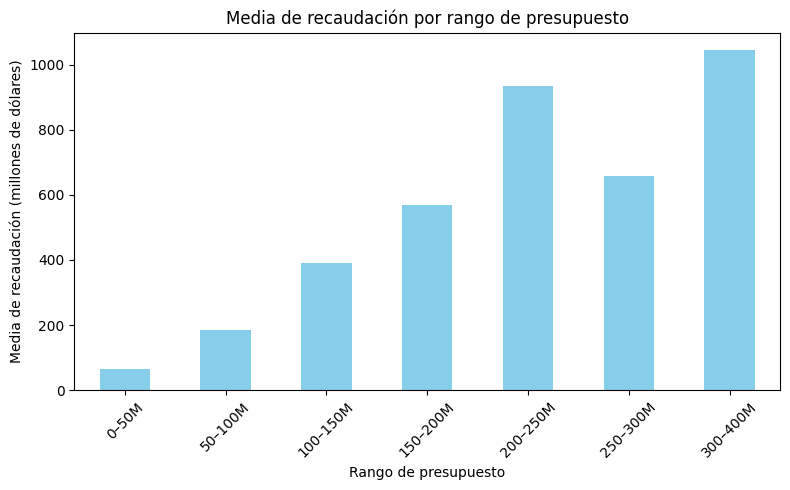

In [38]:

# Copiamos el DataFrame limpio para no modificar el original
df_tramos = dataframe_limpio.copy()

# Creamos los tramos de presupuesto (en millones)
tramos = [0, 50_000_000, 100_000_000, 150_000_000, 200_000_000, 250_000_000, 300_000_000, 400_000_000]
nombres_tramos = ['0–50M', '50–100M', '100–150M', '150–200M', '200–250M', '250–300M', '300–400M']

# Creamos una nueva columna llamada 'grupo_presupuesto' con esos tramos
df_tramos['grupo_presupuesto'] = pd.cut(df_tramos['budget'], bins=tramos, labels=nombres_tramos)

# Agrupamos por 'grupo_presupuesto' y calculamos la media de recaudación
media_recaudacion_por_tramo = df_tramos.groupby('grupo_presupuesto')['revenue'].mean() / 1_000_000  # en millones

# Mostramos los resultados numéricos
print("Media de recaudación por grupo de presupuesto (en millones):")
print(media_recaudacion_por_tramo)

# Dibujamos el gráfico
plt.figure(figsize=(8, 5))
media_recaudacion_por_tramo.plot(kind='bar', color='skyblue')

# Añadimos etiquetas y título
plt.title("Media de recaudación por rango de presupuesto")
plt.xlabel("Rango de presupuesto")
plt.ylabel("Media de recaudación (millones de dólares)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [39]:
# Contamos cuántas películas hay en cada grupo de presupuesto
conteo_por_grupo = df_tramos['grupo_presupuesto'].value_counts().sort_index()
print("Número de películas por grupo de presupuesto:")
print(conteo_por_grupo)


Número de películas por grupo de presupuesto:
grupo_presupuesto
0–50M       2354
50–100M      579
100–150M     175
150–200M      76
200–250M      19
250–300M       7
300–400M       1
Name: count, dtype: int64


Distribución de películas por grupo de presupuesto

| Grupo de presupuesto | Películas | ¿Es representativo?     |
|----------------------|-----------|--------------------------|
| 0–50M                | 2354      | ✅ Muy representativo    |
| 50–100M              | 579       | ✅ Bastante fiable       |
| 100–150M             | 175       | ✅ Aceptable             |
| 150–200M             | 76        | ⚠️ Empieza a ser limitado |
| 200–250M             | 19        | ⚠️ Cuidado               |
| 250–300M             | 7         | ❌ Muy poca muestra      |
| 300–400M             | 1         | ❌ Nada representativo   |


🔍 ¿Qué significa esto para el grupo 250–300M?
Solo hay 7 películas en ese grupo.

Con tan poca muestra, un solo fracaso puede bajar muchísimo la media.

Estadísticamente, ese grupo no es fiable para sacar conclusiones.

👉 Por eso la media de recaudación en ese tramo aparece más baja:
no es que las películas de 250–300M vayan mal, sino que hay muy poca información para saberlo.

✅ Conclusión clave
“La tendencia general muestra que a mayor presupuesto, mayor recaudación media.
Aunque puede haber irregularidades en grupos con muy pocas películas, como el de 250–300 millones, donde la muestra es demasiado pequeña para sacar conclusiones fiables.”

🔍  "no me contradice la hipótesis, pero tampoco me permite afirmarla en ese tramo".

In [40]:
correlacion = dataframe_limpio['budget'].corr(dataframe_limpio['revenue'])
print(f"Coeficiente de correlación: {correlacion:.2f}")


Coeficiente de correlación: 0.70




## 🧠 ¿Qué es la correlación?

La **correlación** es una medida matemática que sirve para saber si **dos cosas están relacionadas**.
En nuestro caso:

> ¿Están relacionadas el presupuesto de una película y lo que recauda?

Es decir:
📈 ¿Cuando sube el presupuesto, también sube la recaudación?
📉 ¿O no hay relación, o incluso ocurre lo contrario?



## 🧪 ¿Cómo se mide?

Se calcula un **número** que se llama **coeficiente de correlación de Pearson**.
Ese número siempre está entre **-1 y 1**:

| Valor de la correlación | Significado claro                                                |
| ----------------------- | ---------------------------------------------------------------- |
| `1`                     | Correlación **perfecta positiva**: cuando sube A, siempre sube B |
| `0.8 a 1`               | Correlación fuerte positiva                                      |
| `0.5 a 0.8`             | Correlación moderada positiva                                    |
| `0.3 a 0.5`             | Correlación débil positiva                                       |
| `0`                     | **Sin relación**                                                 |
| `-0.3 a -1`             | Correlación negativa (cuando sube A, baja B)                     |



### 🎯 En este caso:

Queremos ver si el número está **cerca de 1**, lo cual **apoyaría la hipótesis**:

> “A mayor presupuesto, mayor recaudación”.




## 🧾 ¿Qué hacer con ese número?

Si, por ejemplo, te da:

* `0.75` → **Relación moderadamente fuerte** → Tu hipótesis está bien apoyada.
* `0.25` → Relación débil → Tu hipótesis **no tiene mucho respaldo**.
* `0.90` → Relación fuerte → **Tu hipótesis está muy bien respaldada**.



In [41]:
# Renombramos las columnas en español para coherencia general
dataframe_limpio = dataframe_limpio.rename(columns={
    'budget': 'presupuesto',
    'revenue': 'recaudacion'
})


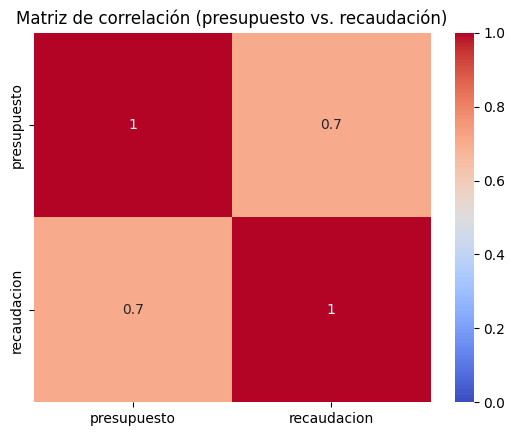

In [42]:
# Calculamos la matriz de correlación
matriz_corr = dataframe_limpio[['presupuesto', 'recaudacion']].corr()

# Dibujamos el mapa de calor
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Matriz de correlación (presupuesto vs. recaudación)")
plt.show()


# ✅ Conclusión de la hipótesis

### “Cuanto mayor el presupuesto de una película, mayor su recaudación.”

---

## 🔍 Análisis general

- Se han analizado **3211 películas** reales.
- Se eliminaron aquellas con datos irreales (por ejemplo, presupuestos de 1 dólar o recaudaciones de 5 dólares).
- Se trabajó solo con películas que tienen **presupuesto y recaudación iguales o superiores a 1.000 dólares**, para asegurar que los resultados fueran fiables y representativos.

---

## 📊 Resultados visuales (gráfico de dispersión con línea de tendencia)

- Se representó cada película en un gráfico, donde el eje horizontal muestra el presupuesto y el eje vertical la recaudación.
- Al añadir una **línea de tendencia**, se observó que:
  - **A mayor presupuesto, la recaudación tiende a ser mayor**.
  - Aunque no todas las películas siguen esta regla, **la mayoría sí lo hace**.

---

## 📈 Análisis por grupos de presupuesto (medias por tramo)

- Las películas se agruparon por rangos de presupuesto (0–50M, 50–100M, etc.).
- Se calculó la **recaudación media** dentro de cada grupo.
- El resultado mostró una **tendencia creciente**:
  - Las películas con **mayor presupuesto recaudan más de media**.
  - Por ejemplo, las que cuestan más de 200 millones recaudan de media entre 900 y 1.000 millones o más.
- El grupo 250–300M rompió un poco la tendencia, pero se debe a que solo hay **7 películas** en ese tramo, por lo que **no es estadísticamente representativo**.

---

## 📐 Resultado estadístico: correlación

- Se calculó el coeficiente de correlación entre presupuesto y recaudación.
- El resultado fue: **`0.70`**.
- Esto indica una **relación positiva moderadamente fuerte**:
  - Cuando sube el presupuesto, **la recaudación también suele subir**.
  - No es una regla perfecta, pero sí se cumple en muchos casos.

---

## ✅ Conclusión final

> **Sí**, los datos respaldan la hipótesis.
> En general, **cuanto mayor es el presupuesto de una película, mayor suele ser su recaudación**.
> Aunque hay excepciones, los datos muestran una **tendencia clara**, tanto visual como numéricamente.
